# Deep Learning
## HW2 - Problem 1

1.   Full Name: Amir Mohammad Yaghoobian zadeh
2.   Student Number: 401300525

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


#part A

In [2]:
train_data = datasets.FashionMNIST(root='./content/gdrive/Deep learning/HW2/Data', train= True, transform= ToTensor(), target_transform= Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1)), download=True)
val_data = datasets.FashionMNIST(root='./content/gdrive/Deep learning/HW2/Data', train= False, transform= ToTensor(), target_transform= Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1)), download= True)

x_train = torch.concat([train_data[i][0] for i in range(train_data.__len__())]).reshape(60000, 28*28)
x_val = torch.concat([val_data[i][0] for i in range(val_data.__len__())]).reshape(10000, 28*28)
y_train = torch.concat([train_data[i][1] for i in range(train_data.__len__())]).reshape(60000, 10)
y_val = torch.concat([val_data[i][1] for i in range(val_data.__len__())]).reshape(10000, 10)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./content/gdrive/Deep learning/HW2/Data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./content/gdrive/Deep learning/HW2/Data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./content/gdrive/Deep learning/HW2/Data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./content/gdrive/Deep learning/HW2/Data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./content/gdrive/Deep learning/HW2/Data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./content/gdrive/Deep learning/HW2/Data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./content/gdrive/Deep learning/HW2/Data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./content/gdrive/Deep learning/HW2/Data/FashionMNIST/raw



Label: 0


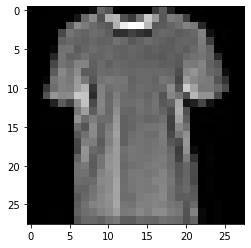

Label: 1


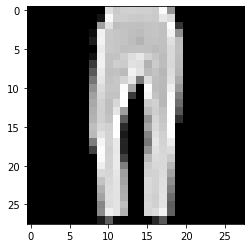

Label: 2


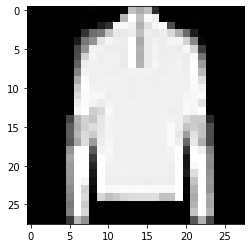

Label: 3


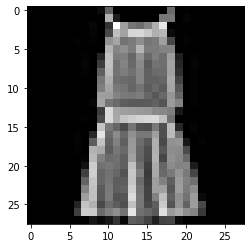

Label: 4


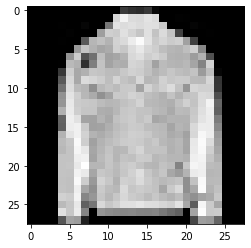

Label: 5


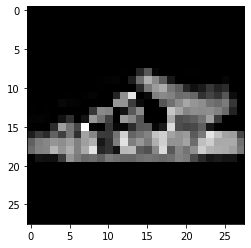

Label: 6


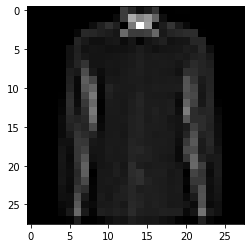

Label: 7


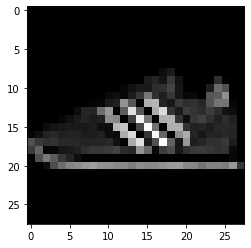

Label: 8


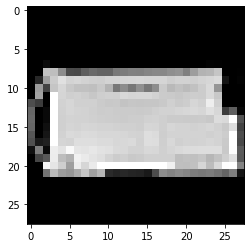

Label: 9


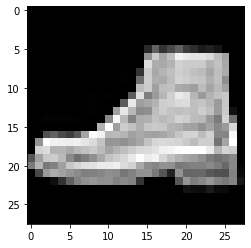

In [3]:
for i in range(10):
  wh = torch.where(y_train[:,i]==1)[0]
  temp = torch.randint(low=0, high=wh.shape[0], size=(1,))[0]
  print(f'Label: {i}')
  plt.imshow(train_data[wh[temp]][0].squeeze(),cmap='gray')
  plt.show()

#part B

In [4]:
# Relu
# def Activation(x):
#   return x * (1+torch.sign(x))/2

# tanh
def Activation(x):
  return torch.tanh(x)

def softmax(x):
  return torch.exp(x)/torch.exp(x).sum(dim=1).repeat(10).reshape(-1,10)

def cross_entropy(y, y_pred):

  regularization = 0
  for L in MODEL:
    regularization += torch.norm(L.W)

  return -torch.mean(torch.sum(y * torch.log(y_pred), dim=1)) + 0.001 * regularization


class full_layer():
  def __init__(self, n, m):
    # self.W = torch.zeros(n, m, requires_grad=True)
    # self.b = torch.rand(1, m, requires_grad=True)

    temp = np.sqrt(12/(m+n))
    temp1 = np.random.rand(n, m) * 2 * temp - temp
    self.W = torch.tensor(temp1, dtype=torch.float32, requires_grad=True)
    temp2 = np.random.rand(1, m) * 2 * temp - temp
    self.b = torch.tensor(temp2, dtype=torch.float32, requires_grad=True)


def model(x):
  for i, L in enumerate(MODEL[:-1]):
    x = Activation(x @ L.W + L.b)
  
  out = softmax(x @ MODEL[-1].W + MODEL[-1].b)

  return out
  
def backward(lr):
  with torch.no_grad():
    for L in MODEL:
      L.W -= lr * L.W.grad
      L.b -= lr * L.b.grad
      # L.W -= lr * L.W.grad / torch.norm(L.W.grad)
      # L.b -= lr * L.b.grad / torch.norm(L.b.grad)
      L.W.grad.zero_()
      L.b.grad.zero_()

  
# model layers
L1 = full_layer(28*28,250)
L2 = full_layer(250,500)
L3 = full_layer(500,250)
L4 = full_layer(250,100)
L5 = full_layer(100,10)

MODEL = [L1, L2, L3, L4, L5]

#part C (training)

In [5]:
# trianing loop
epochs = 50
batch_size = 128
learning_rate = 0.01

n_steps=np.asarray(np.ceil(x_train.shape[0]/batch_size),dtype=np.int64)
train_loss = []
val_loss = []
train_acc = []
val_acc = []

for epoch in range(epochs):
  shuffle = torch.randperm(x_train.shape[0])
  x_train = x_train[shuffle]
  y_train = y_train[shuffle]

  for b in range(n_steps):
    out = model(x_train[batch_size * b: (b+1) * batch_size])
    loss = cross_entropy(y_train[batch_size * b: (b+1) * batch_size], out)
    loss.backward()
    lr = learning_rate
    backward(lr)


  y_pred = model(x_train)
  train_loss.append(cross_entropy(y_train, y_pred).item())
  train_acc.append((y_train.argmax(dim=1)==y_pred.argmax(dim=1)).sum()/60000)
  y_pred = model(x_val)
  val_loss.append(cross_entropy(y_val, y_pred).item())
  val_acc.append((y_val.argmax(dim=1)==y_pred.argmax(dim=1)).sum()/10000)
  print(f"Epoch {epoch}  ==> train loss: {train_loss[-1]}, train acc: {train_acc[-1]}, test loss: {val_loss[-1]}, test acc: {val_acc[-1]}") 




Epoch 0  ==> train loss: 0.5988125801086426, train acc: 0.7555500268936157, test loss: 0.6208491325378418, test acc: 0.7475000023841858
Epoch 1  ==> train loss: 0.5541250705718994, train acc: 0.7328833341598511, test loss: 0.5520216822624207, test acc: 0.7314000129699707
Epoch 2  ==> train loss: 0.5308778285980225, train acc: 0.7590166926383972, test loss: 0.5369867086410522, test acc: 0.7560999989509583
Epoch 3  ==> train loss: 0.505980372428894, train acc: 0.7677833437919617, test loss: 0.5212838053703308, test acc: 0.7577999830245972
Epoch 4  ==> train loss: 0.4897395670413971, train acc: 0.7611333131790161, test loss: 0.4915648102760315, test acc: 0.7522000074386597
Epoch 5  ==> train loss: 0.48382997512817383, train acc: 0.7699499726295471, test loss: 0.4881865978240967, test acc: 0.7594000101089478
Epoch 6  ==> train loss: 0.48976144194602966, train acc: 0.7824500203132629, test loss: 0.5017836093902588, test acc: 0.7713000178337097
Epoch 7  ==> train loss: 0.46713826060295105, t

#part D (validation)

test acc: 0.8023999929428101



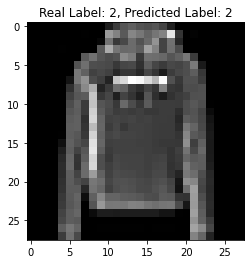

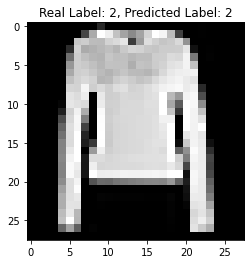

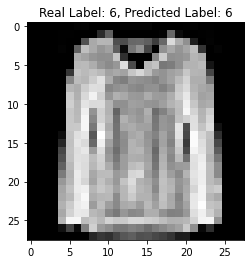

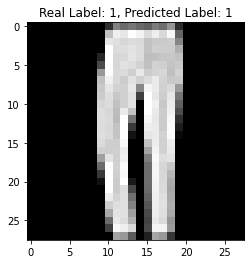

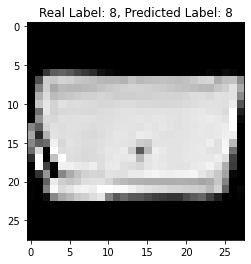

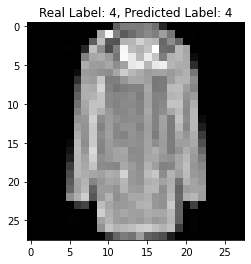

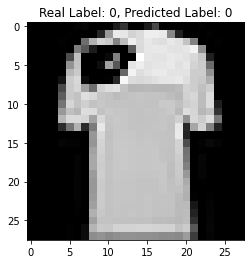

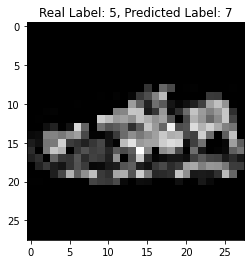

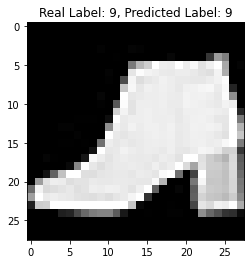

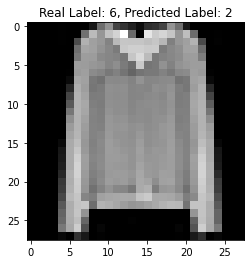

In [6]:
y_pred = model(x_val)
print(f"test acc: {(y_val.argmax(dim=1)==y_pred.argmax(dim=1)).sum()/10000}\n")

for i in range(10):
  temp = torch.randint(low=0, high=x_val.shape[0], size=(1,))[0]
  plt.imshow(val_data[temp][0].squeeze(),cmap='gray')
  plt.title(f'Real Label: {val_data[temp][1].argmax()}, Predicted Label: {model(val_data[temp][0].reshape(1,-1)).argmax()}')
  plt.show()